# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.majority, past=Past.all, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 19760 substitutions for model Model(time=Time.continuous, source=Source.majority, past=Past.all, durl=Durl.all)


  0% (    1 of 19760) |                   | Elapsed Time: 0:00:04 ETA:  22:40:38

  0% (  109 of 19760) |                    | Elapsed Time: 0:00:05 ETA:  0:03:03

  1% (  209 of 19760) |                    | Elapsed Time: 0:00:06 ETA:  0:03:07

  1% (  247 of 19760) |                    | Elapsed Time: 0:00:06 ETA:  0:03:15

  1% (  356 of 19760) |                    | Elapsed Time: 0:00:07 ETA:  0:03:07

  2% (  467 of 19760) |                    | Elapsed Time: 0:00:08 ETA:  0:03:02

  2% (  494 of 19760) |                    | Elapsed Time: 0:00:08 ETA:  0:03:01

  3% (  606 of 19760) |                    | Elapsed Time: 0:00:09 ETA:  0:02:58

  3% (  709 of 19760) |                    | Elapsed Time: 0:00:10 ETA:  0:02:58

  3% (  741 of 19760) |                    | Elapsed Time: 0:00:11 ETA:  0:02:58

  4% (  852 of 19760) |                    | Elapsed Time: 0:00:12 ETA:  0:02:56

  4% (  958 of 19760) |                    | Elapsed Time: 0:00:13 ETA:  0:02:53

  5% (  988 of 19760) |#                   | Elapsed Time: 0:00:13 ETA:  0:02:51

  5% ( 1089 of 19760) |#                   | Elapsed Time: 0:00:14 ETA:  0:02:52

  6% ( 1203 of 19760) |#                   | Elapsed Time: 0:00:15 ETA:  0:02:50

  6% ( 1235 of 19760) |#                   | Elapsed Time: 0:00:15 ETA:  0:02:49

  6% ( 1306 of 19760) |#                   | Elapsed Time: 0:00:16 ETA:  0:02:59

  7% ( 1422 of 19760) |#                   | Elapsed Time: 0:00:17 ETA:  0:02:54

  7% ( 1482 of 19760) |#                   | Elapsed Time: 0:00:18 ETA:  0:02:53

  8% ( 1588 of 19760) |#                   | Elapsed Time: 0:00:19 ETA:  0:02:54

  8% ( 1689 of 19760) |#                   | Elapsed Time: 0:00:20 ETA:  0:02:54

  8% ( 1729 of 19760) |#                   | Elapsed Time: 0:00:20 ETA:  0:02:55

  9% ( 1832 of 19760) |#                   | Elapsed Time: 0:00:21 ETA:  0:02:54

  9% ( 1931 of 19760) |#                   | Elapsed Time: 0:00:22 ETA:  0:02:57

 10% ( 1976 of 19760) |##                  | Elapsed Time: 0:00:23 ETA:  0:02:57

 10% ( 2074 of 19760) |##                  | Elapsed Time: 0:00:24 ETA:  0:02:49

 11% ( 2190 of 19760) |##                  | Elapsed Time: 0:00:25 ETA:  0:02:47

 11% ( 2223 of 19760) |##                  | Elapsed Time: 0:00:25 ETA:  0:02:46

 11% ( 2324 of 19760) |##                  | Elapsed Time: 0:00:26 ETA:  0:02:46

 12% ( 2420 of 19760) |##                  | Elapsed Time: 0:00:27 ETA:  0:02:47

 12% ( 2470 of 19760) |##                  | Elapsed Time: 0:00:28 ETA:  0:02:44

 13% ( 2579 of 19760) |##                  | Elapsed Time: 0:00:29 ETA:  0:02:41

 13% ( 2688 of 19760) |##                  | Elapsed Time: 0:00:30 ETA:  0:02:38

 13% ( 2717 of 19760) |##                  | Elapsed Time: 0:00:30 ETA:  0:02:37

 14% ( 2828 of 19760) |##                  | Elapsed Time: 0:00:31 ETA:  0:02:33

 14% ( 2885 of 19760) |##                  | Elapsed Time: 0:00:32 ETA:  0:02:48

 15% ( 2964 of 19760) |###                 | Elapsed Time: 0:00:33 ETA:  0:02:46

 15% ( 3078 of 19760) |###                 | Elapsed Time: 0:00:34 ETA:  0:02:41

 16% ( 3171 of 19760) |###                 | Elapsed Time: 0:00:35 ETA:  0:02:41

 16% ( 3211 of 19760) |###                 | Elapsed Time: 0:00:35 ETA:  0:02:41

 16% ( 3299 of 19760) |###                 | Elapsed Time: 0:00:36 ETA:  0:02:45

 17% ( 3389 of 19760) |###                 | Elapsed Time: 0:00:37 ETA:  0:02:50

 17% ( 3458 of 19760) |###                 | Elapsed Time: 0:00:38 ETA:  0:02:54

 17% ( 3544 of 19760) |###                 | Elapsed Time: 0:00:39 ETA:  0:03:01

 18% ( 3655 of 19760) |###                 | Elapsed Time: 0:00:40 ETA:  0:02:44

 18% ( 3705 of 19760) |###                 | Elapsed Time: 0:00:40 ETA:  0:02:44

 19% ( 3821 of 19760) |###                 | Elapsed Time: 0:00:41 ETA:  0:02:42

 20% ( 3952 of 19760) |####                | Elapsed Time: 0:00:43 ETA:  0:02:36

 20% ( 4067 of 19760) |####                | Elapsed Time: 0:00:44 ETA:  0:02:28

 21% ( 4168 of 19760) |####                | Elapsed Time: 0:00:45 ETA:  0:02:24

 21% ( 4199 of 19760) |####                | Elapsed Time: 0:00:45 ETA:  0:02:19

 21% ( 4299 of 19760) |####                | Elapsed Time: 0:00:46 ETA:  0:02:14

 22% ( 4412 of 19760) |####                | Elapsed Time: 0:00:47 ETA:  0:02:13

 22% ( 4446 of 19760) |####                | Elapsed Time: 0:00:47 ETA:  0:02:15

 23% ( 4557 of 19760) |####                | Elapsed Time: 0:00:48 ETA:  0:02:15

 23% ( 4653 of 19760) |####                | Elapsed Time: 0:00:49 ETA:  0:02:17

 23% ( 4693 of 19760) |####                | Elapsed Time: 0:00:50 ETA:  0:02:17

 24% ( 4795 of 19760) |####                | Elapsed Time: 0:00:51 ETA:  0:02:19

 24% ( 4907 of 19760) |####                | Elapsed Time: 0:00:52 ETA:  0:02:15

 25% ( 4940 of 19760) |#####               | Elapsed Time: 0:00:52 ETA:  0:02:15

 25% ( 5052 of 19760) |#####               | Elapsed Time: 0:00:53 ETA:  0:02:11

 26% ( 5187 of 19760) |#####               | Elapsed Time: 0:00:54 ETA:  0:02:09

 26% ( 5253 of 19760) |#####               | Elapsed Time: 0:00:55 ETA:  0:02:20

 27% ( 5353 of 19760) |#####               | Elapsed Time: 0:00:56 ETA:  0:02:18

 27% ( 5434 of 19760) |#####               | Elapsed Time: 0:00:57 ETA:  0:02:15

 28% ( 5556 of 19760) |#####               | Elapsed Time: 0:00:58 ETA:  0:02:09

 28% ( 5681 of 19760) |#####               | Elapsed Time: 0:00:59 ETA:  0:02:05

 29% ( 5776 of 19760) |#####               | Elapsed Time: 0:01:00 ETA:  0:02:09

 29% ( 5891 of 19760) |#####               | Elapsed Time: 0:01:01 ETA:  0:02:07

 30% ( 5928 of 19760) |######              | Elapsed Time: 0:01:01 ETA:  0:02:06

 30% ( 6038 of 19760) |######              | Elapsed Time: 0:01:02 ETA:  0:01:54

 31% ( 6175 of 19760) |######              | Elapsed Time: 0:01:03 ETA:  0:01:50

 31% ( 6274 of 19760) |######              | Elapsed Time: 0:01:04 ETA:  0:01:55

 32% ( 6385 of 19760) |######              | Elapsed Time: 0:01:05 ETA:  0:01:57

 32% ( 6422 of 19760) |######              | Elapsed Time: 0:01:06 ETA:  0:01:56

 33% ( 6529 of 19760) |######              | Elapsed Time: 0:01:07 ETA:  0:01:52

 33% ( 6669 of 19760) |######              | Elapsed Time: 0:01:08 ETA:  0:01:51

 34% ( 6795 of 19760) |######              | Elapsed Time: 0:01:09 ETA:  0:01:46

 35% ( 6916 of 19760) |#######             | Elapsed Time: 0:01:10 ETA:  0:01:47

 35% ( 7021 of 19760) |#######             | Elapsed Time: 0:01:11 ETA:  0:01:44

 36% ( 7163 of 19760) |#######             | Elapsed Time: 0:01:12 ETA:  0:01:39

 36% ( 7288 of 19760) |#######             | Elapsed Time: 0:01:13 ETA:  0:01:34

 37% ( 7410 of 19760) |#######             | Elapsed Time: 0:01:14 ETA:  0:01:32

 38% ( 7524 of 19760) |#######             | Elapsed Time: 0:01:15 ETA:  0:01:32

 38% ( 7629 of 19760) |#######             | Elapsed Time: 0:01:16 ETA:  0:01:35

 38% ( 7657 of 19760) |#######             | Elapsed Time: 0:01:16 ETA:  0:01:33

 39% ( 7770 of 19760) |#######             | Elapsed Time: 0:01:17 ETA:  0:01:33

 39% ( 7877 of 19760) |#######             | Elapsed Time: 0:01:18 ETA:  0:01:32

 40% ( 7904 of 19760) |########            | Elapsed Time: 0:01:19 ETA:  0:01:33

 40% ( 8007 of 19760) |########            | Elapsed Time: 0:01:20 ETA:  0:01:35

 41% ( 8151 of 19760) |########            | Elapsed Time: 0:01:21 ETA:  0:01:36

 41% ( 8258 of 19760) |########            | Elapsed Time: 0:01:22 ETA:  0:01:37

 42% ( 8319 of 19760) |########            | Elapsed Time: 0:01:23 ETA:  0:01:49

 42% ( 8398 of 19760) |########            | Elapsed Time: 0:01:24 ETA:  0:01:46

 43% ( 8506 of 19760) |########            | Elapsed Time: 0:01:25 ETA:  0:01:46

 43% ( 8615 of 19760) |########            | Elapsed Time: 0:01:26 ETA:  0:01:45

 43% ( 8645 of 19760) |########            | Elapsed Time: 0:01:26 ETA:  0:01:46

 44% ( 8747 of 19760) |########            | Elapsed Time: 0:01:27 ETA:  0:01:45

 44% ( 8863 of 19760) |########            | Elapsed Time: 0:01:28 ETA:  0:01:46

 45% ( 8892 of 19760) |#########           | Elapsed Time: 0:01:28 ETA:  0:01:45

 45% ( 9001 of 19760) |#########           | Elapsed Time: 0:01:29 ETA:  0:01:43

 46% ( 9116 of 19760) |#########           | Elapsed Time: 0:01:30 ETA:  0:01:28

 46% ( 9139 of 19760) |#########           | Elapsed Time: 0:01:30 ETA:  0:01:30

 46% ( 9250 of 19760) |#########           | Elapsed Time: 0:01:31 ETA:  0:01:28

 47% ( 9363 of 19760) |#########           | Elapsed Time: 0:01:32 ETA:  0:01:26

 47% ( 9386 of 19760) |#########           | Elapsed Time: 0:01:33 ETA:  0:01:25

 48% ( 9508 of 19760) |#########           | Elapsed Time: 0:01:34 ETA:  0:01:19

 48% ( 9633 of 19760) |#########           | Elapsed Time: 0:01:35 ETA:  0:01:20

 49% ( 9753 of 19760) |#########           | Elapsed Time: 0:01:36 ETA:  0:01:17

 50% ( 9880 of 19760) |##########          | Elapsed Time: 0:01:37 ETA:  0:01:14

 50% ( 9984 of 19760) |##########          | Elapsed Time: 0:01:38 ETA:  0:01:14

 51% (10090 of 19760) |##########          | Elapsed Time: 0:01:39 ETA:  0:01:15

 51% (10127 of 19760) |##########          | Elapsed Time: 0:01:39 ETA:  0:01:14

 51% (10223 of 19760) |##########          | Elapsed Time: 0:01:40 ETA:  0:01:19

 52% (10334 of 19760) |##########          | Elapsed Time: 0:01:41 ETA:  0:01:18

 52% (10374 of 19760) |##########          | Elapsed Time: 0:01:41 ETA:  0:01:17

 53% (10489 of 19760) |##########          | Elapsed Time: 0:01:42 ETA:  0:01:18

 53% (10621 of 19760) |##########          | Elapsed Time: 0:01:44 ETA:  0:01:19

 54% (10724 of 19760) |##########          | Elapsed Time: 0:01:45 ETA:  0:01:18

 54% (10825 of 19760) |##########          | Elapsed Time: 0:01:46 ETA:  0:01:19

 55% (10868 of 19760) |###########         | Elapsed Time: 0:01:46 ETA:  0:01:19

 55% (10986 of 19760) |###########         | Elapsed Time: 0:01:47 ETA:  0:01:12

 56% (11115 of 19760) |###########         | Elapsed Time: 0:01:48 ETA:  0:01:09

 56% (11231 of 19760) |###########         | Elapsed Time: 0:01:49 ETA:  0:01:08

 57% (11340 of 19760) |###########         | Elapsed Time: 0:01:50 ETA:  0:01:08

 57% (11362 of 19760) |###########         | Elapsed Time: 0:01:50 ETA:  0:01:08

 58% (11475 of 19760) |###########         | Elapsed Time: 0:01:51 ETA:  0:01:04

 58% (11574 of 19760) |###########         | Elapsed Time: 0:01:52 ETA:  0:01:04

 58% (11609 of 19760) |###########         | Elapsed Time: 0:01:53 ETA:  0:01:04

 59% (11720 of 19760) |###########         | Elapsed Time: 0:01:54 ETA:  0:01:05

 59% (11818 of 19760) |###########         | Elapsed Time: 0:01:55 ETA:  0:01:08

 60% (11856 of 19760) |############        | Elapsed Time: 0:01:55 ETA:  0:01:09

 60% (11968 of 19760) |############        | Elapsed Time: 0:01:56 ETA:  0:01:09

 61% (12080 of 19760) |############        | Elapsed Time: 0:01:57 ETA:  0:01:07

 61% (12103 of 19760) |############        | Elapsed Time: 0:01:58 ETA:  0:01:24

 61% (12213 of 19760) |############        | Elapsed Time: 0:01:59 ETA:  0:01:24

 62% (12320 of 19760) |############        | Elapsed Time: 0:02:00 ETA:  0:01:21

 62% (12350 of 19760) |############        | Elapsed Time: 0:02:00 ETA:  0:01:20

 63% (12452 of 19760) |############        | Elapsed Time: 0:02:01 ETA:  0:01:22

 63% (12570 of 19760) |############        | Elapsed Time: 0:02:02 ETA:  0:01:15

 63% (12597 of 19760) |############        | Elapsed Time: 0:02:02 ETA:  0:01:14

 64% (12682 of 19760) |############        | Elapsed Time: 0:02:03 ETA:  0:01:20

 64% (12797 of 19760) |############        | Elapsed Time: 0:02:05 ETA:  0:01:19

 65% (12844 of 19760) |#############       | Elapsed Time: 0:02:05 ETA:  0:00:59

 65% (12947 of 19760) |#############       | Elapsed Time: 0:02:06 ETA:  0:01:00

 66% (13051 of 19760) |#############       | Elapsed Time: 0:02:07 ETA:  0:01:00

 66% (13091 of 19760) |#############       | Elapsed Time: 0:02:07 ETA:  0:01:00

 66% (13199 of 19760) |#############       | Elapsed Time: 0:02:08 ETA:  0:00:57

 67% (13310 of 19760) |#############       | Elapsed Time: 0:02:09 ETA:  0:00:58

 67% (13338 of 19760) |#############       | Elapsed Time: 0:02:10 ETA:  0:00:59

 68% (13441 of 19760) |#############       | Elapsed Time: 0:02:11 ETA:  0:00:54

 68% (13545 of 19760) |#############       | Elapsed Time: 0:02:12 ETA:  0:00:55

 68% (13585 of 19760) |#############       | Elapsed Time: 0:02:12 ETA:  0:00:56

 69% (13702 of 19760) |#############       | Elapsed Time: 0:02:13 ETA:  0:00:52

 69% (13785 of 19760) |#############       | Elapsed Time: 0:02:14 ETA:  0:00:56

 70% (13832 of 19760) |##############      | Elapsed Time: 0:02:14 ETA:  0:00:56

 70% (13945 of 19760) |##############      | Elapsed Time: 0:02:15 ETA:  0:00:54

 71% (14079 of 19760) |##############      | Elapsed Time: 0:02:17 ETA:  0:00:51

 71% (14193 of 19760) |##############      | Elapsed Time: 0:02:18 ETA:  0:00:47

 72% (14326 of 19760) |##############      | Elapsed Time: 0:02:19 ETA:  0:00:41

 73% (14441 of 19760) |##############      | Elapsed Time: 0:02:20 ETA:  0:00:40

 73% (14552 of 19760) |##############      | Elapsed Time: 0:02:21 ETA:  0:00:33

 73% (14573 of 19760) |##############      | Elapsed Time: 0:02:21 ETA:  0:00:32

 74% (14691 of 19760) |##############      | Elapsed Time: 0:02:22 ETA:  0:00:30

 75% (14820 of 19760) |###############     | Elapsed Time: 0:02:23 ETA:  0:00:30

 75% (14931 of 19760) |###############     | Elapsed Time: 0:02:24 ETA:  0:00:29

 76% (15067 of 19760) |###############     | Elapsed Time: 0:02:25 ETA:  0:00:30

 76% (15177 of 19760) |###############     | Elapsed Time: 0:02:26 ETA:  0:00:30

 77% (15314 of 19760) |###############     | Elapsed Time: 0:02:28 ETA:  0:00:27

 78% (15425 of 19760) |###############     | Elapsed Time: 0:02:29 ETA:  0:00:28

 78% (15521 of 19760) |###############     | Elapsed Time: 0:02:30 ETA:  0:00:30

 78% (15561 of 19760) |###############     | Elapsed Time: 0:02:30 ETA:  0:00:30

 79% (15680 of 19760) |###############     | Elapsed Time: 0:02:31 ETA:  0:00:27

 80% (15808 of 19760) |################    | Elapsed Time: 0:02:32 ETA:  0:00:25

 80% (15922 of 19760) |################    | Elapsed Time: 0:02:33 ETA:  0:00:23

 81% (16055 of 19760) |################    | Elapsed Time: 0:02:34 ETA:  0:00:22

 81% (16162 of 19760) |################    | Elapsed Time: 0:02:35 ETA:  0:00:22

 82% (16271 of 19760) |################    | Elapsed Time: 0:02:36 ETA:  0:00:18

 82% (16302 of 19760) |################    | Elapsed Time: 0:02:37 ETA:  0:00:17

 83% (16415 of 19760) |################    | Elapsed Time: 0:02:38 ETA:  0:00:18

 83% (16549 of 19760) |################    | Elapsed Time: 0:02:39 ETA:  0:00:18

 84% (16665 of 19760) |################    | Elapsed Time: 0:02:40 ETA:  0:00:17

 84% (16754 of 19760) |################    | Elapsed Time: 0:02:41 ETA:  0:00:36

 85% (16796 of 19760) |#################   | Elapsed Time: 0:02:42 ETA:  0:00:36

 85% (16907 of 19760) |#################   | Elapsed Time: 0:02:43 ETA:  0:00:34

 86% (17043 of 19760) |#################   | Elapsed Time: 0:02:44 ETA:  0:00:31

 86% (17148 of 19760) |#################   | Elapsed Time: 0:02:45 ETA:  0:00:32

 87% (17252 of 19760) |#################   | Elapsed Time: 0:02:46 ETA:  0:00:33

 87% (17290 of 19760) |#################   | Elapsed Time: 0:02:46 ETA:  0:00:33

 88% (17412 of 19760) |#################   | Elapsed Time: 0:02:47 ETA:  0:00:30

 88% (17537 of 19760) |#################   | Elapsed Time: 0:02:48 ETA:  0:00:08

 89% (17623 of 19760) |#################   | Elapsed Time: 0:02:49 ETA:  0:00:13

 89% (17728 of 19760) |#################   | Elapsed Time: 0:02:50 ETA:  0:00:15

 90% (17784 of 19760) |##################  | Elapsed Time: 0:02:51 ETA:  0:00:13

 90% (17901 of 19760) |##################  | Elapsed Time: 0:02:52 ETA:  0:00:09

 91% (18008 of 19760) |##################  | Elapsed Time: 0:02:53 ETA:  0:00:07

 91% (18031 of 19760) |##################  | Elapsed Time: 0:02:53 ETA:  0:00:07

 91% (18139 of 19760) |##################  | Elapsed Time: 0:02:54 ETA:  0:00:10

 92% (18245 of 19760) |##################  | Elapsed Time: 0:02:55 ETA:  0:00:12

 92% (18278 of 19760) |##################  | Elapsed Time: 0:02:55 ETA:  0:00:13

 93% (18389 of 19760) |##################  | Elapsed Time: 0:02:56 ETA:  0:00:05

 93% (18489 of 19760) |##################  | Elapsed Time: 0:02:57 ETA:  0:00:06

 93% (18525 of 19760) |##################  | Elapsed Time: 0:02:58 ETA:  0:00:09

 94% (18641 of 19760) |##################  | Elapsed Time: 0:02:59 ETA:  0:00:08

 94% (18737 of 19760) |##################  | Elapsed Time: 0:03:00 ETA:  0:00:10

 95% (18772 of 19760) |################### | Elapsed Time: 0:03:00 ETA:  0:00:10

 95% (18886 of 19760) |################### | Elapsed Time: 0:03:01 ETA:  0:00:07

 96% (18986 of 19760) |################### | Elapsed Time: 0:03:02 ETA:  0:00:07

 96% (19019 of 19760) |################### | Elapsed Time: 0:03:02 ETA:  0:00:04

 96% (19134 of 19760) |################### | Elapsed Time: 0:03:03 ETA:  0:00:02

 97% (19234 of 19760) |################### | Elapsed Time: 0:03:05 ETA:  0:00:01

 97% (19266 of 19760) |################### | Elapsed Time: 0:03:05 ETA:  0:00:00

 98% (19385 of 19760) |################### | Elapsed Time: 0:03:06 ETA:  0:00:00

 98% (19513 of 19760) |################### | Elapsed Time: 0:03:07 ETA:  0:00:00

 99% (19607 of 19760) |################### | Elapsed Time: 0:03:08 ETA:  0:00:00

 99% (19704 of 19760) |################### | Elapsed Time: 0:03:09 ETA:  0:00:00

100% (19760 of 19760) |####################| Elapsed Time: 0:03:09 Time: 0:03:09


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

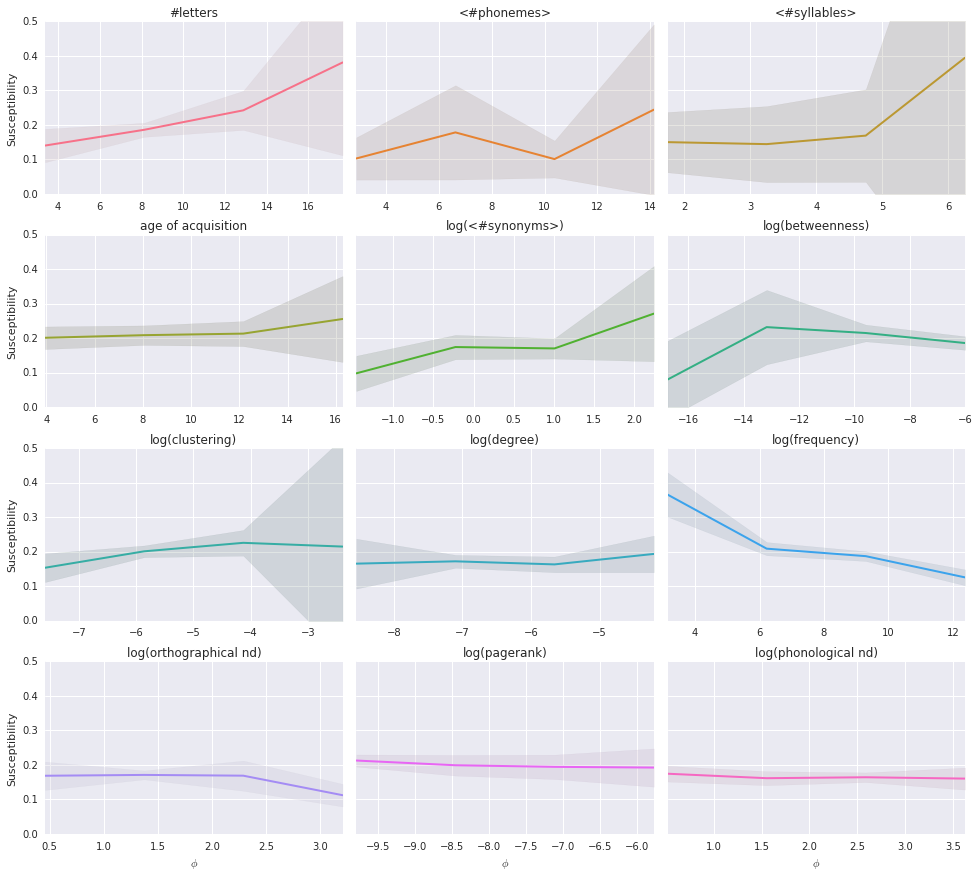

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

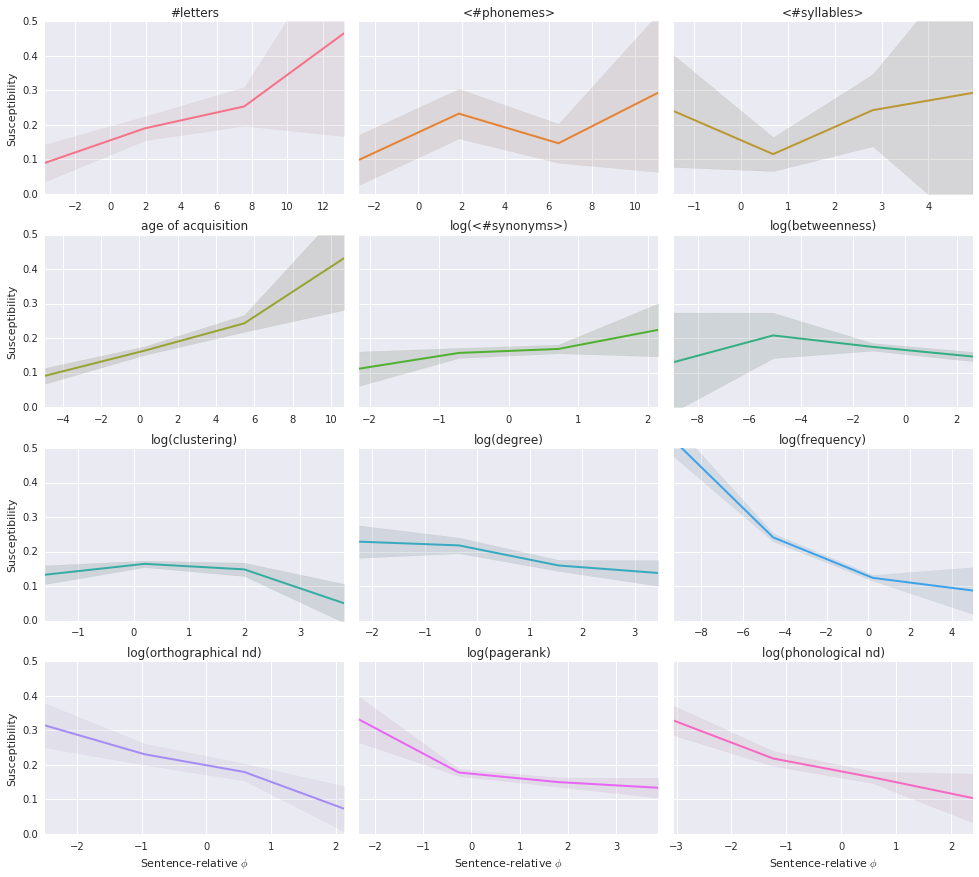

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

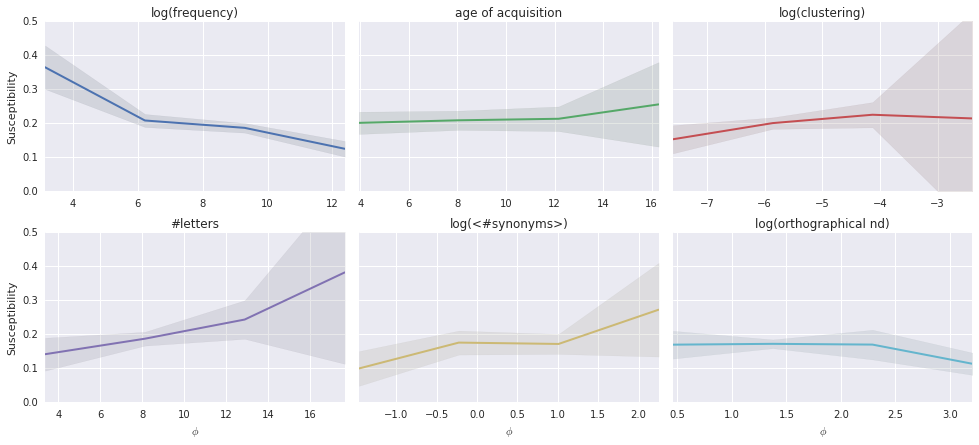

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

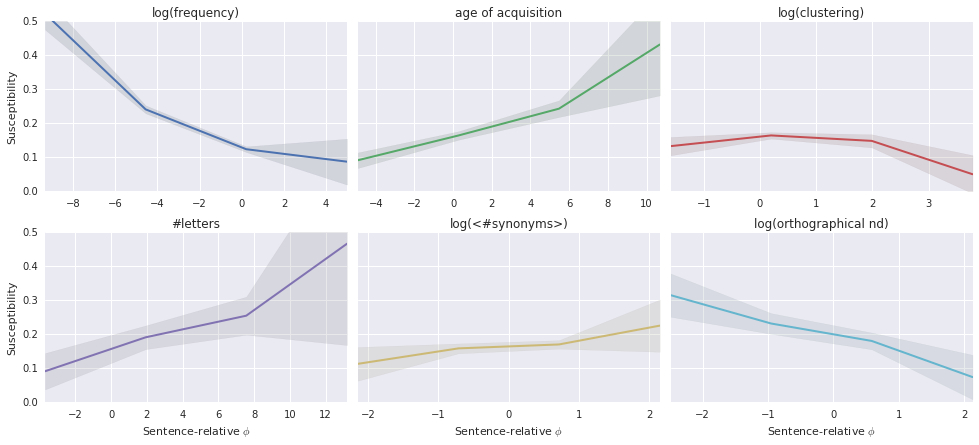

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

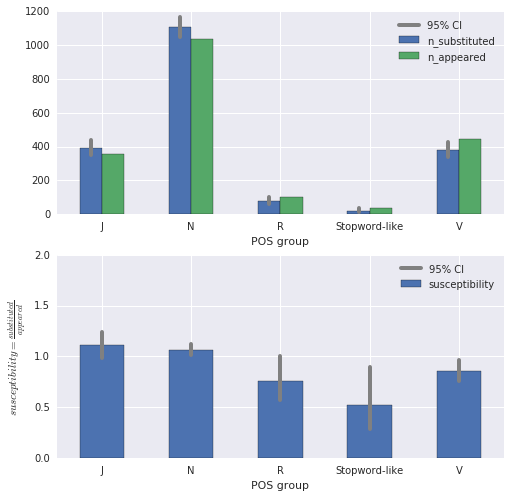

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['N', 'R', 'Stopword-like', 'V']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

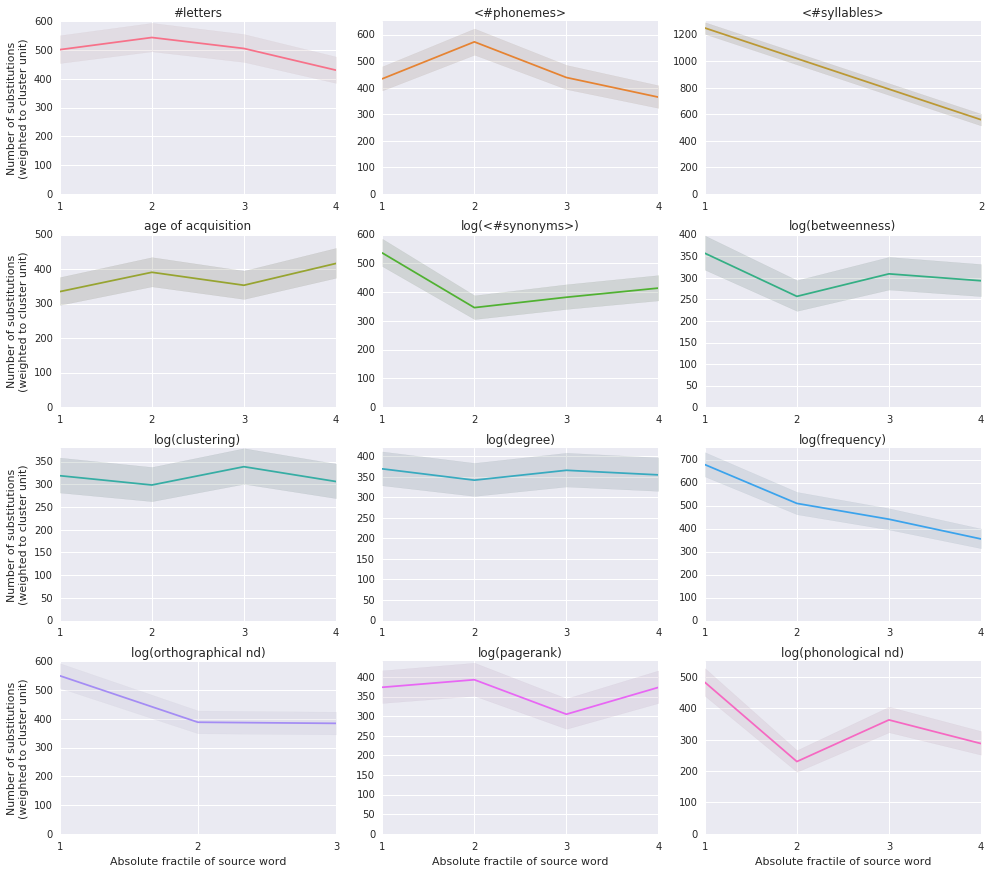

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

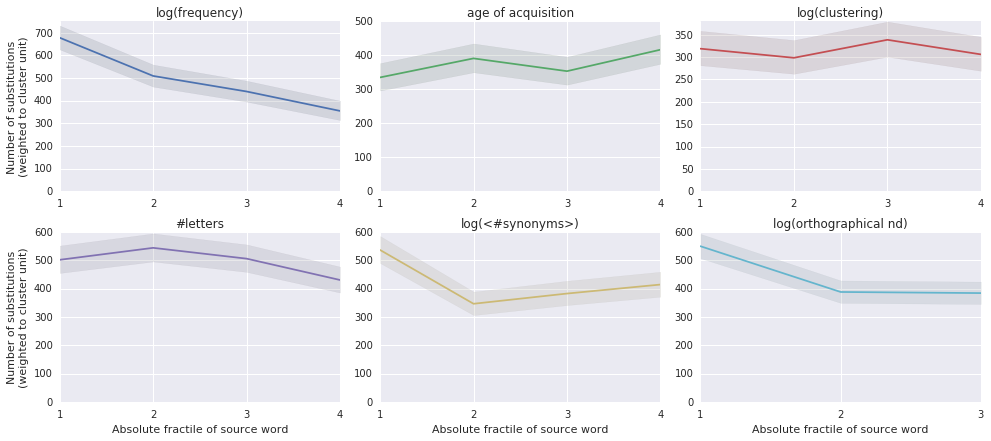

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (   91 of 19760) |                    | Elapsed Time: 0:00:01 ETA:  0:03:39

  1% (  203 of 19760) |                    | Elapsed Time: 0:00:02 ETA:  0:02:54

  1% (  247 of 19760) |                    | Elapsed Time: 0:00:02 ETA:  0:03:06

  1% (  343 of 19760) |                    | Elapsed Time: 0:00:03 ETA:  0:03:12

  2% (  447 of 19760) |                    | Elapsed Time: 0:00:04 ETA:  0:03:09

  2% (  494 of 19760) |                    | Elapsed Time: 0:00:04 ETA:  0:03:09

  3% (  593 of 19760) |                    | Elapsed Time: 0:00:05 ETA:  0:03:09

  3% (  704 of 19760) |                    | Elapsed Time: 0:00:07 ETA:  0:03:06

  3% (  741 of 19760) |                    | Elapsed Time: 0:00:07 ETA:  0:03:06

  4% (  820 of 19760) |                    | Elapsed Time: 0:00:08 ETA:  0:03:11

  4% (  898 of 19760) |                    | Elapsed Time: 0:00:09 ETA:  0:03:20

  5% (  988 of 19760) |#                   | Elapsed Time: 0:00:10 ETA:  0:03:17

  5% ( 1070 of 19760) |#                   | Elapsed Time: 0:00:11 ETA:  0:03:20

  5% ( 1173 of 19760) |#                   | Elapsed Time: 0:00:12 ETA:  0:03:20

  6% ( 1235 of 19760) |#                   | Elapsed Time: 0:00:12 ETA:  0:03:19

  6% ( 1340 of 19760) |#                   | Elapsed Time: 0:00:13 ETA:  0:03:16

  7% ( 1454 of 19760) |#                   | Elapsed Time: 0:00:14 ETA:  0:03:14

  7% ( 1482 of 19760) |#                   | Elapsed Time: 0:00:15 ETA:  0:03:13

  7% ( 1569 of 19760) |#                   | Elapsed Time: 0:00:16 ETA:  0:03:10

  8% ( 1662 of 19760) |#                   | Elapsed Time: 0:00:17 ETA:  0:03:05

  8% ( 1729 of 19760) |#                   | Elapsed Time: 0:00:18 ETA:  0:03:10

  9% ( 1831 of 19760) |#                   | Elapsed Time: 0:00:19 ETA:  0:03:03

  9% ( 1925 of 19760) |#                   | Elapsed Time: 0:00:20 ETA:  0:03:05

 10% ( 1976 of 19760) |##                  | Elapsed Time: 0:00:20 ETA:  0:03:05

 10% ( 2066 of 19760) |##                  | Elapsed Time: 0:00:21 ETA:  0:03:09

 10% ( 2162 of 19760) |##                  | Elapsed Time: 0:00:22 ETA:  0:03:13

 11% ( 2223 of 19760) |##                  | Elapsed Time: 0:00:23 ETA:  0:03:12

 11% ( 2320 of 19760) |##                  | Elapsed Time: 0:00:24 ETA:  0:03:08

 12% ( 2410 of 19760) |##                  | Elapsed Time: 0:00:25 ETA:  0:03:08

 12% ( 2470 of 19760) |##                  | Elapsed Time: 0:00:25 ETA:  0:03:01

 12% ( 2565 of 19760) |##                  | Elapsed Time: 0:00:26 ETA:  0:03:02

 13% ( 2663 of 19760) |##                  | Elapsed Time: 0:00:27 ETA:  0:03:00

 13% ( 2717 of 19760) |##                  | Elapsed Time: 0:00:28 ETA:  0:03:01

 14% ( 2805 of 19760) |##                  | Elapsed Time: 0:00:29 ETA:  0:03:00

 14% ( 2903 of 19760) |##                  | Elapsed Time: 0:00:30 ETA:  0:02:58

 15% ( 2964 of 19760) |###                 | Elapsed Time: 0:00:31 ETA:  0:02:59

 15% ( 3057 of 19760) |###                 | Elapsed Time: 0:00:32 ETA:  0:03:00

 15% ( 3140 of 19760) |###                 | Elapsed Time: 0:00:33 ETA:  0:03:01

 16% ( 3211 of 19760) |###                 | Elapsed Time: 0:00:34 ETA:  0:03:04

 16% ( 3296 of 19760) |###                 | Elapsed Time: 0:00:35 ETA:  0:03:06

 17% ( 3377 of 19760) |###                 | Elapsed Time: 0:00:36 ETA:  0:03:10

 17% ( 3458 of 19760) |###                 | Elapsed Time: 0:00:37 ETA:  0:03:09

 17% ( 3544 of 19760) |###                 | Elapsed Time: 0:00:38 ETA:  0:03:09

 18% ( 3633 of 19760) |###                 | Elapsed Time: 0:00:39 ETA:  0:03:11

 18% ( 3705 of 19760) |###                 | Elapsed Time: 0:00:39 ETA:  0:03:11

 19% ( 3800 of 19760) |###                 | Elapsed Time: 0:00:40 ETA:  0:03:09

 19% ( 3905 of 19760) |###                 | Elapsed Time: 0:00:41 ETA:  0:03:02

 20% ( 3952 of 19760) |####                | Elapsed Time: 0:00:42 ETA:  0:02:55

 20% ( 4060 of 19760) |####                | Elapsed Time: 0:00:43 ETA:  0:02:47

 21% ( 4169 of 19760) |####                | Elapsed Time: 0:00:44 ETA:  0:02:39

 21% ( 4199 of 19760) |####                | Elapsed Time: 0:00:44 ETA:  0:02:34

 21% ( 4299 of 19760) |####                | Elapsed Time: 0:00:45 ETA:  0:02:30

 22% ( 4401 of 19760) |####                | Elapsed Time: 0:00:46 ETA:  0:02:25

 22% ( 4446 of 19760) |####                | Elapsed Time: 0:00:47 ETA:  0:02:22

 23% ( 4554 of 19760) |####                | Elapsed Time: 0:00:48 ETA:  0:02:18

 23% ( 4659 of 19760) |####                | Elapsed Time: 0:00:49 ETA:  0:02:17

 23% ( 4693 of 19760) |####                | Elapsed Time: 0:00:49 ETA:  0:02:18

 24% ( 4816 of 19760) |####                | Elapsed Time: 0:00:50 ETA:  0:02:13

 24% ( 4918 of 19760) |####                | Elapsed Time: 0:00:51 ETA:  0:02:14

 25% ( 4940 of 19760) |#####               | Elapsed Time: 0:00:51 ETA:  0:02:17

 25% ( 5041 of 19760) |#####               | Elapsed Time: 0:00:52 ETA:  0:02:15

 26% ( 5147 of 19760) |#####               | Elapsed Time: 0:00:53 ETA:  0:02:13

 26% ( 5187 of 19760) |#####               | Elapsed Time: 0:00:54 ETA:  0:02:11

 26% ( 5281 of 19760) |#####               | Elapsed Time: 0:00:55 ETA:  0:02:14

 27% ( 5384 of 19760) |#####               | Elapsed Time: 0:00:56 ETA:  0:02:14

 27% ( 5434 of 19760) |#####               | Elapsed Time: 0:00:56 ETA:  0:02:18

 27% ( 5520 of 19760) |#####               | Elapsed Time: 0:00:57 ETA:  0:02:27

 28% ( 5627 of 19760) |#####               | Elapsed Time: 0:00:58 ETA:  0:02:25

 28% ( 5681 of 19760) |#####               | Elapsed Time: 0:00:59 ETA:  0:02:22

 29% ( 5773 of 19760) |#####               | Elapsed Time: 0:01:00 ETA:  0:02:24

 29% ( 5875 of 19760) |#####               | Elapsed Time: 0:01:01 ETA:  0:02:24

 30% ( 5928 of 19760) |######              | Elapsed Time: 0:01:02 ETA:  0:02:56

 30% ( 6025 of 19760) |######              | Elapsed Time: 0:01:03 ETA:  0:02:57

 31% ( 6128 of 19760) |######              | Elapsed Time: 0:01:04 ETA:  0:02:49

 31% ( 6175 of 19760) |######              | Elapsed Time: 0:01:05 ETA:  0:02:46

 31% ( 6259 of 19760) |######              | Elapsed Time: 0:01:06 ETA:  0:02:53

 32% ( 6344 of 19760) |######              | Elapsed Time: 0:01:07 ETA:  0:02:55

 32% ( 6422 of 19760) |######              | Elapsed Time: 0:01:08 ETA:  0:02:54

 33% ( 6541 of 19760) |######              | Elapsed Time: 0:01:09 ETA:  0:02:47

 33% ( 6669 of 19760) |######              | Elapsed Time: 0:01:10 ETA:  0:02:09

 34% ( 6774 of 19760) |######              | Elapsed Time: 0:01:11 ETA:  0:02:06

 34% ( 6868 of 19760) |######              | Elapsed Time: 0:01:12 ETA:  0:02:07

 35% ( 6916 of 19760) |#######             | Elapsed Time: 0:01:12 ETA:  0:02:08

 35% ( 7009 of 19760) |#######             | Elapsed Time: 0:01:13 ETA:  0:02:05

 36% ( 7119 of 19760) |#######             | Elapsed Time: 0:01:14 ETA:  0:01:58

 36% ( 7163 of 19760) |#######             | Elapsed Time: 0:01:15 ETA:  0:01:58

 36% ( 7255 of 19760) |#######             | Elapsed Time: 0:01:16 ETA:  0:02:04

 37% ( 7364 of 19760) |#######             | Elapsed Time: 0:01:17 ETA:  0:02:02

 37% ( 7410 of 19760) |#######             | Elapsed Time: 0:01:17 ETA:  0:02:02

 37% ( 7504 of 19760) |#######             | Elapsed Time: 0:01:18 ETA:  0:02:04

 38% ( 7594 of 19760) |#######             | Elapsed Time: 0:01:19 ETA:  0:02:04

 38% ( 7657 of 19760) |#######             | Elapsed Time: 0:01:20 ETA:  0:02:02

 39% ( 7765 of 19760) |#######             | Elapsed Time: 0:01:21 ETA:  0:01:57

 39% ( 7858 of 19760) |#######             | Elapsed Time: 0:01:22 ETA:  0:02:01

 40% ( 7904 of 19760) |########            | Elapsed Time: 0:01:22 ETA:  0:01:58

 40% ( 8031 of 19760) |########            | Elapsed Time: 0:01:23 ETA:  0:01:48

 41% ( 8151 of 19760) |########            | Elapsed Time: 0:01:25 ETA:  0:01:49

 41% ( 8241 of 19760) |########            | Elapsed Time: 0:01:26 ETA:  0:01:49

 42% ( 8349 of 19760) |########            | Elapsed Time: 0:01:27 ETA:  0:01:43

 42% ( 8398 of 19760) |########            | Elapsed Time: 0:01:27 ETA:  0:01:41

 43% ( 8503 of 19760) |########            | Elapsed Time: 0:01:28 ETA:  0:01:41

 43% ( 8598 of 19760) |########            | Elapsed Time: 0:01:29 ETA:  0:01:39

 43% ( 8645 of 19760) |########            | Elapsed Time: 0:01:30 ETA:  0:01:41

 44% ( 8743 of 19760) |########            | Elapsed Time: 0:01:31 ETA:  0:01:47

 44% ( 8854 of 19760) |########            | Elapsed Time: 0:01:32 ETA:  0:01:45

 45% ( 8892 of 19760) |#########           | Elapsed Time: 0:01:32 ETA:  0:01:45

 45% ( 8994 of 19760) |#########           | Elapsed Time: 0:01:33 ETA:  0:01:41

 46% ( 9093 of 19760) |#########           | Elapsed Time: 0:01:34 ETA:  0:01:42

 46% ( 9139 of 19760) |#########           | Elapsed Time: 0:01:35 ETA:  0:01:44

 46% ( 9230 of 19760) |#########           | Elapsed Time: 0:01:36 ETA:  0:01:46

 47% ( 9328 of 19760) |#########           | Elapsed Time: 0:01:37 ETA:  0:01:45

 47% ( 9386 of 19760) |#########           | Elapsed Time: 0:01:37 ETA:  0:01:43

 48% ( 9487 of 19760) |#########           | Elapsed Time: 0:01:38 ETA:  0:01:41

 48% ( 9599 of 19760) |#########           | Elapsed Time: 0:01:39 ETA:  0:01:40

 48% ( 9633 of 19760) |#########           | Elapsed Time: 0:01:39 ETA:  0:01:37

 49% ( 9746 of 19760) |#########           | Elapsed Time: 0:01:40 ETA:  0:01:33

 50% ( 9880 of 19760) |##########          | Elapsed Time: 0:01:42 ETA:  0:01:26

 50% (10001 of 19760) |##########          | Elapsed Time: 0:01:43 ETA:  0:01:17

 51% (10104 of 19760) |##########          | Elapsed Time: 0:01:44 ETA:  0:01:15

 51% (10127 of 19760) |##########          | Elapsed Time: 0:01:44 ETA:  0:01:14

 51% (10232 of 19760) |##########          | Elapsed Time: 0:01:45 ETA:  0:01:12

 52% (10374 of 19760) |##########          | Elapsed Time: 0:01:46 ETA:  0:01:08

 52% (10465 of 19760) |##########          | Elapsed Time: 0:01:47 ETA:  0:01:13

 53% (10564 of 19760) |##########          | Elapsed Time: 0:01:48 ETA:  0:01:17

 53% (10621 of 19760) |##########          | Elapsed Time: 0:01:49 ETA:  0:01:18

 54% (10733 of 19760) |##########          | Elapsed Time: 0:01:50 ETA:  0:01:19

 54% (10843 of 19760) |##########          | Elapsed Time: 0:01:51 ETA:  0:01:16

 55% (10868 of 19760) |###########         | Elapsed Time: 0:01:51 ETA:  0:01:17

 55% (10965 of 19760) |###########         | Elapsed Time: 0:01:52 ETA:  0:01:18

 56% (11070 of 19760) |###########         | Elapsed Time: 0:01:53 ETA:  0:01:21

 56% (11115 of 19760) |###########         | Elapsed Time: 0:01:53 ETA:  0:01:20

 56% (11227 of 19760) |###########         | Elapsed Time: 0:01:54 ETA:  0:01:14

 57% (11338 of 19760) |###########         | Elapsed Time: 0:01:55 ETA:  0:01:10

 57% (11362 of 19760) |###########         | Elapsed Time: 0:01:56 ETA:  0:01:10

 58% (11467 of 19760) |###########         | Elapsed Time: 0:01:57 ETA:  0:01:10

 58% (11569 of 19760) |###########         | Elapsed Time: 0:01:58 ETA:  0:01:11

 58% (11609 of 19760) |###########         | Elapsed Time: 0:01:58 ETA:  0:01:11

 59% (11729 of 19760) |###########         | Elapsed Time: 0:01:59 ETA:  0:01:04

 59% (11830 of 19760) |###########         | Elapsed Time: 0:02:00 ETA:  0:01:04

 60% (11856 of 19760) |############        | Elapsed Time: 0:02:00 ETA:  0:01:05

 60% (11981 of 19760) |############        | Elapsed Time: 0:02:01 ETA:  0:01:01

 61% (12103 of 19760) |############        | Elapsed Time: 0:02:02 ETA:  0:00:53

 62% (12252 of 19760) |############        | Elapsed Time: 0:02:03 ETA:  0:00:43

 62% (12350 of 19760) |############        | Elapsed Time: 0:02:04 ETA:  0:00:41

 63% (12454 of 19760) |############        | Elapsed Time: 0:02:05 ETA:  0:00:39

 63% (12560 of 19760) |############        | Elapsed Time: 0:02:06 ETA:  0:00:39

 63% (12597 of 19760) |############        | Elapsed Time: 0:02:06 ETA:  0:00:39

 64% (12700 of 19760) |############        | Elapsed Time: 0:02:07 ETA:  0:00:38

 64% (12812 of 19760) |############        | Elapsed Time: 0:02:08 ETA:  0:00:37

 65% (12844 of 19760) |#############       | Elapsed Time: 0:02:09 ETA:  0:00:39

 65% (12960 of 19760) |#############       | Elapsed Time: 0:02:10 ETA:  0:00:44

 66% (13059 of 19760) |#############       | Elapsed Time: 0:02:11 ETA:  0:00:54

 66% (13091 of 19760) |#############       | Elapsed Time: 0:02:11 ETA:  0:00:56

 66% (13195 of 19760) |#############       | Elapsed Time: 0:02:12 ETA:  0:00:55

 67% (13338 of 19760) |#############       | Elapsed Time: 0:02:13 ETA:  0:00:48

 68% (13444 of 19760) |#############       | Elapsed Time: 0:02:14 ETA:  0:00:46

 68% (13548 of 19760) |#############       | Elapsed Time: 0:02:15 ETA:  0:00:47

 68% (13585 of 19760) |#############       | Elapsed Time: 0:02:16 ETA:  0:00:47

 69% (13694 of 19760) |#############       | Elapsed Time: 0:02:17 ETA:  0:00:48

 69% (13776 of 19760) |#############       | Elapsed Time: 0:02:18 ETA:  0:00:52

 70% (13832 of 19760) |##############      | Elapsed Time: 0:02:18 ETA:  0:00:50

 70% (13929 of 19760) |##############      | Elapsed Time: 0:02:19 ETA:  0:00:50

 71% (14046 of 19760) |##############      | Elapsed Time: 0:02:20 ETA:  0:00:51

 71% (14079 of 19760) |##############      | Elapsed Time: 0:02:20 ETA:  0:00:52

 72% (14252 of 19760) |##############      | Elapsed Time: 0:02:21 ETA:  0:00:35

 72% (14326 of 19760) |##############      | Elapsed Time: 0:02:22 ETA:  0:00:35

 72% (14421 of 19760) |##############      | Elapsed Time: 0:02:23 ETA:  0:00:37

 73% (14525 of 19760) |##############      | Elapsed Time: 0:02:24 ETA:  0:00:37

 73% (14573 of 19760) |##############      | Elapsed Time: 0:02:25 ETA:  0:00:31

 74% (14700 of 19760) |##############      | Elapsed Time: 0:02:26 ETA:  0:00:26

 75% (14820 of 19760) |###############     | Elapsed Time: 0:02:27 ETA:  0:00:24

 75% (14854 of 19760) |###############     | Elapsed Time: 0:02:29 ETA:  0:00:56

 75% (14961 of 19760) |###############     | Elapsed Time: 0:02:30 ETA:  0:01:14

 76% (15067 of 19760) |###############     | Elapsed Time: 0:02:31 ETA:  0:01:11

 76% (15175 of 19760) |###############     | Elapsed Time: 0:02:32 ETA:  0:01:09

 77% (15273 of 19760) |###############     | Elapsed Time: 0:02:33 ETA:  0:01:06

 77% (15314 of 19760) |###############     | Elapsed Time: 0:02:33 ETA:  0:01:18

 78% (15417 of 19760) |###############     | Elapsed Time: 0:02:34 ETA:  0:01:17

 78% (15524 of 19760) |###############     | Elapsed Time: 0:02:35 ETA:  0:01:11

 78% (15561 of 19760) |###############     | Elapsed Time: 0:02:35 ETA:  0:00:34

 79% (15677 of 19760) |###############     | Elapsed Time: 0:02:36 ETA:  0:00:30

 79% (15769 of 19760) |###############     | Elapsed Time: 0:02:37 ETA:  0:00:33

 80% (15808 of 19760) |################    | Elapsed Time: 0:02:38 ETA:  0:00:32

 80% (15930 of 19760) |################    | Elapsed Time: 0:02:39 ETA:  0:00:27

 81% (16055 of 19760) |################    | Elapsed Time: 0:02:40 ETA:  0:00:22

 81% (16163 of 19760) |################    | Elapsed Time: 0:02:41 ETA:  0:00:20

 82% (16272 of 19760) |################    | Elapsed Time: 0:02:42 ETA:  0:00:19

 82% (16302 of 19760) |################    | Elapsed Time: 0:02:42 ETA:  0:00:17

 82% (16400 of 19760) |################    | Elapsed Time: 0:02:43 ETA:  0:00:21

 83% (16504 of 19760) |################    | Elapsed Time: 0:02:44 ETA:  0:00:17

 83% (16549 of 19760) |################    | Elapsed Time: 0:02:45 ETA:  0:00:17

 84% (16655 of 19760) |################    | Elapsed Time: 0:02:46 ETA:  0:00:20

 84% (16770 of 19760) |################    | Elapsed Time: 0:02:47 ETA:  0:00:19

 85% (16796 of 19760) |#################   | Elapsed Time: 0:02:47 ETA:  0:00:18

 85% (16906 of 19760) |#################   | Elapsed Time: 0:02:48 ETA:  0:00:16

 86% (17010 of 19760) |#################   | Elapsed Time: 0:02:49 ETA:  0:00:16

 86% (17043 of 19760) |#################   | Elapsed Time: 0:02:49 ETA:  0:00:16

 86% (17151 of 19760) |#################   | Elapsed Time: 0:02:50 ETA:  0:00:13

 87% (17242 of 19760) |#################   | Elapsed Time: 0:02:51 ETA:  0:00:15

 87% (17290 of 19760) |#################   | Elapsed Time: 0:02:51 ETA:  0:00:13

 88% (17421 of 19760) |#################   | Elapsed Time: 0:02:52 ETA:  0:00:06

 88% (17537 of 19760) |#################   | Elapsed Time: 0:02:54 ETA:  0:00:06

 89% (17660 of 19760) |#################   | Elapsed Time: 0:02:55 ETA:  0:00:01

 89% (17761 of 19760) |#################   | Elapsed Time: 0:02:56 ETA:  0:00:01

 90% (17784 of 19760) |##################  | Elapsed Time: 0:02:56 ETA:  0:00:01

 90% (17900 of 19760) |##################  | Elapsed Time: 0:02:57 ETA:  0:00:00

 91% (18031 of 19760) |##################  | Elapsed Time: 0:02:58 ETA:  0:00:00

 91% (18141 of 19760) |##################  | Elapsed Time: 0:02:59 ETA:  0:00:00

 92% (18236 of 19760) |##################  | Elapsed Time: 0:03:00 ETA:  0:00:00

 92% (18278 of 19760) |##################  | Elapsed Time: 0:03:00 ETA:  0:00:00

 93% (18396 of 19760) |##################  | Elapsed Time: 0:03:01 ETA:  0:00:00

 93% (18501 of 19760) |##################  | Elapsed Time: 0:03:02 ETA:  0:00:00

 93% (18525 of 19760) |##################  | Elapsed Time: 0:03:03 ETA:  0:00:00

 94% (18626 of 19760) |##################  | Elapsed Time: 0:03:04 ETA:  0:00:02

 94% (18728 of 19760) |##################  | Elapsed Time: 0:03:05 ETA:  0:00:04

 95% (18772 of 19760) |################### | Elapsed Time: 0:03:05 ETA:  0:00:04

 95% (18870 of 19760) |################### | Elapsed Time: 0:03:06 ETA:  0:00:06

 96% (18985 of 19760) |################### | Elapsed Time: 0:03:07 ETA:  0:00:00

 96% (19019 of 19760) |################### | Elapsed Time: 0:03:07 ETA:  0:00:01

 96% (19123 of 19760) |################### | Elapsed Time: 0:03:08 ETA:  0:00:03

 97% (19236 of 19760) |################### | Elapsed Time: 0:03:09 ETA:  0:00:00

 97% (19266 of 19760) |################### | Elapsed Time: 0:03:10 ETA:  0:00:00

 98% (19377 of 19760) |################### | Elapsed Time: 0:03:11 ETA:  0:00:00

 98% (19513 of 19760) |################### | Elapsed Time: 0:03:12 ETA:  0:00:00

 99% (19618 of 19760) |################### | Elapsed Time: 0:03:13 ETA:  0:00:00

 99% (19720 of 19760) |################### | Elapsed Time: 0:03:14 ETA:  0:00:00

100% (19760 of 19760) |####################| Elapsed Time: 0:03:14 Time: 0:03:14


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

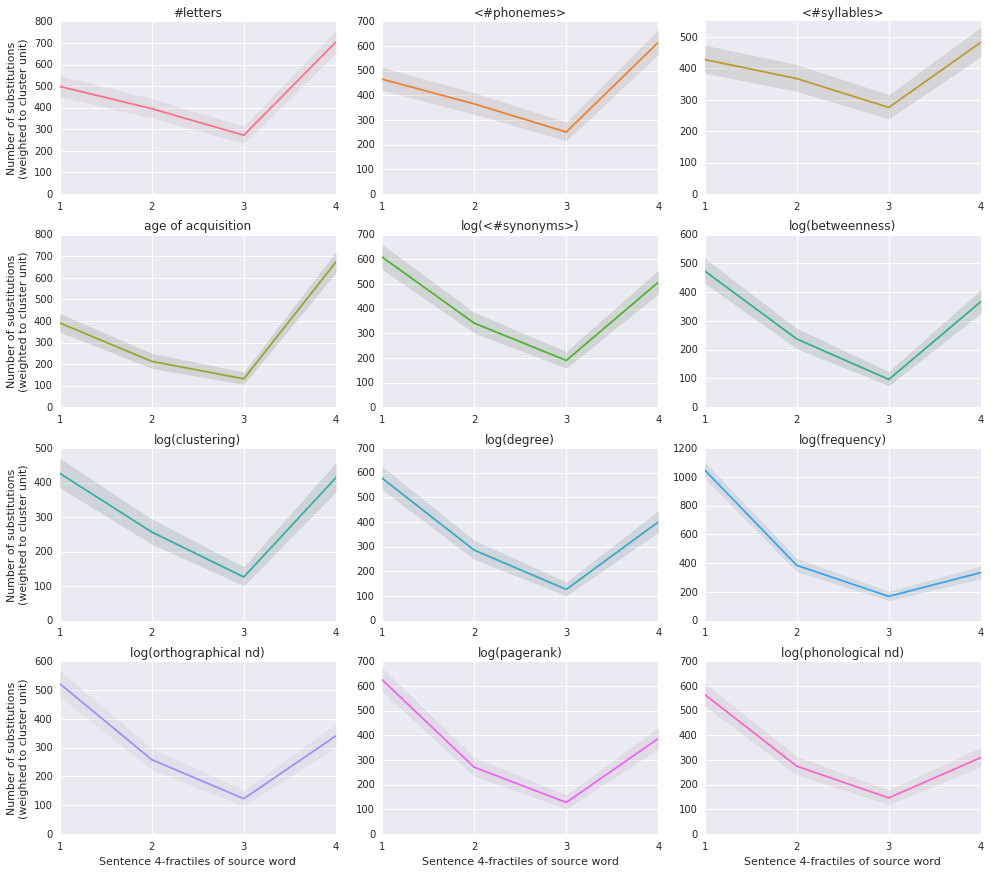

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

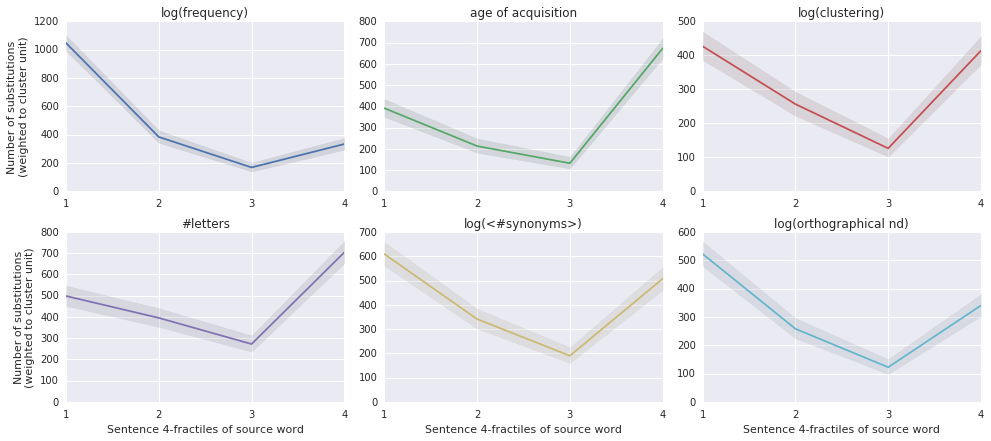

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)